In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [6]:
train_dir = "C:/Users/shiri/Desktop/Anul3_Sem2/SI/P3/EmotionDetection/train" 
test_dir = "C:/Users/shiri/Desktop/Anul3_Sem2/SI/P3/EmotionDetection/test" 

Here we are telling  where to find the training and testing data that your machine learning model will use.

In [9]:
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

model = tf.keras.models.Sequential([
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(5, 5), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),

    Dense(7, activation='softmax')
])


Here, you're defining a convolutional neural network (CNN) model using the Sequential API in TensorFlow/Keras. The model consists of convolutional layers for extracting features from images, followed by pooling layers for downsampling, batch normalization layers for stabilizing training, dropout layers for regularization, and dense layers for classification. The final layer uses the softmax activation function to output probabilities for each class, making it suitable for multi-class classification tasks like emotion detection from images.

In simple terms, we're creating a model that can understand images. It learns to recognize patterns in pictures, like shapes and colors, and decides which emotion the picture might represent.

In [ ]:
img_size=48

This indicates that each image will be resized or processed to have a width and height of 48 pixels each.

In [11]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

These lines set up tools to prepare and process images for training and validation. For training, images are adjusted slightly in size and flipped horizontally to create more varied examples. All images are also scaled to have values between 0 and 1. Additionally, 20% of the training data is reserved for validation to check how well the model is learning without being directly trained on those examples.

Below we are creating "data generators" to feed batches of images into the model during training and validation. For training, images are taken from the train_dir, while for validation, they're taken from test_dir. The generators resize the images, convert them to grayscale, and group them into batches of 64. They also organize the images by their classes for classification purposes.

In [12]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [14]:
from keras.optimizers import Adam

# Define the learning rate
learning_rate = 0.001

# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


model.compile() function is like setting up a plan for how your neural network will learn. It decides how the network will adjust its internal parameters (like weights) using an optimizer, what goal it's trying to achieve (like minimizing errors) with a loss function, and what measurements to track (like accuracy) during the learning process.

In [15]:
epochs = 45
batch_size = 64

These parameters define how your model learns from the data during training. With 45 epochs, the model will see the entire dataset 45 times, refining its understanding with each pass. The batch size of 64 means that the model will process 64 images at a time, adjusting its weights based on their collective patterns.

In [16]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45


C:\Users\shiri\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.2085 - loss: 2.2681 - val_accuracy: 0.1795 - val_loss: 2.3563
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.2945 - loss: 1.8140 - val_accuracy: 0.1557 - val_loss: 2.3931
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.4049 - loss: 1.5515 - val_accuracy: 0.4483 - val_loss: 1.4455
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 367s 1s/step - accuracy: 0.4765 - loss: 1.3671 - val_accuracy: 0.5112 - val_loss: 1.2943
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.5052 - loss: 1.2873 - val_accuracy: 0.5538 - val_loss: 1.1880
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 352s 978ms/step - accuracy: 0.5342 - loss: 1.2142 - val_accuracy: 0.4958 - val_loss: 1.3005
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 370s 1s/step - accuracy: 0.5496 - loss: 1.1879 - val_accuracy: 0.5726 - val_loss: 1.1345
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.5607 - loss: 1.1554 - val_accuracy: 0.

Here we trained model using the training data generated by train_generator for a specified number of epochs (epochs). During training, the model's performance is evaluated on the validation data generated by validation_generator. The training process updates the model's parameters (weights and biases) to minimize the loss function, aiming to improve its performance on both the training and validation datasets. The training history, including metrics such as loss and accuracy, is stored in the history variable, allowing you to visualize and analyze the model's performance over time.

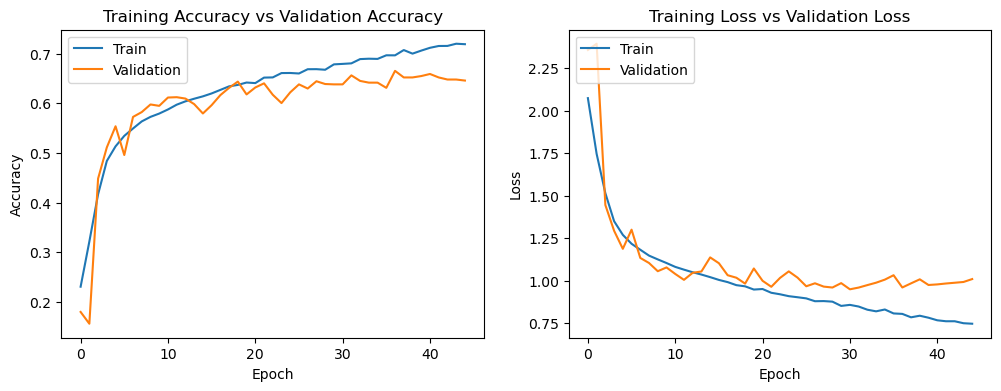

In [18]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()


Here we wanted to visualize the performance of our model during training. 
The first graph shows how the accuracy of predictions changes over each epoch for both the training and validation datasets. 
The second graph shows how the loss, or error, of your model changes over each epoch for both the training and validation datasets. It helps us to understand how well our model is learning and whether it's overfitting or underfitting.

In [20]:
model.save_weights('model_weights.weights.h5')


Here we save the weights of our trained model to a file named 'model_weights.h5'. These weights represent the learned parameters of our model after training, including the values of the neural network's connections. Saving the weights allows us to later reload the model with the same architecture and apply these learned parameters to make predictions on new data without retraining the model.

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_height = 48
img_width = 48

# Preprocess the input image
def preprocess_image(image_path):
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    return img_array

def predict_emotion_with_image(image_path):
    # Load and display the image
    img = load_img(image_path, color_mode='grayscale', target_size=(img_height, img_width))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()
    
    # Preprocess the image
    preprocessed_img = preprocess_image(image_path)
    
    # Make predictions
    predictions = model.predict(preprocessed_img)
    predicted_class = tf.argmax(predictions[0]).numpy()
    
    return predicted_class

def class_to_emotion(predicted_emotion):
    res_dict = {0: 'angry', 
                1: 'disgusted',
                2: 'fearful',
                3: 'happy',
                4: 'neutral',
                5: 'sad',
                6: 'surprised'
               }
    
    return res_dict[predicted_emotion]

This set of functions helps analyze emotions from images. First, the image is prepared for analysis by converting it to grayscale, resizing it, and normalizing it. Then, the trained model predicts the emotion conveyed by the image, and the result is converted into a human-readable emotion label, such as "angry" or "happy." This process allows for quick and easy identification of emotions in images.

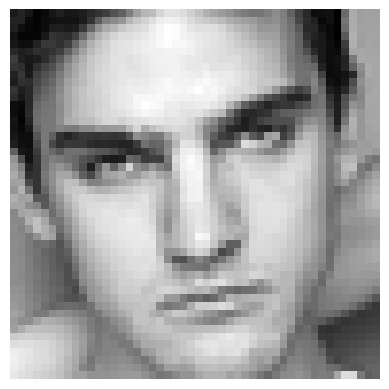

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted emotion class: neutral


In [27]:
image_path = "C:/Users/shiri/Desktop/Anul3_Sem2/SI/P3/EmotionDetection/test/angry/im10.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))

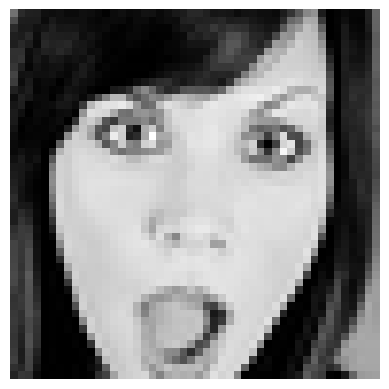

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted emotion class: surprised


In [28]:
image_path = "C:/Users/shiri/Desktop/Anul3_Sem2/SI/P3/EmotionDetection/test/surprised/im10.png"
predicted_emotion = predict_emotion_with_image(image_path)
print("Predicted emotion class:", class_to_emotion(predicted_emotion))